In [1]:
import numpy as np
import pandas as pd 
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn import svm
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import Normalizer

In [2]:
global filename
global svm_mae,random_mae,logistic_mae,epp_mae
global matrix_factor
global X, Y, X_train, X_test, y_train, y_test
global epp
global classifier


In [3]:
courses = ['Database Developer','Portal Administrator','Systems Security Administrator','Business Systems Analyst','Software Systems Engineer',
           'Business Intelligence Analyst','CRM Technical Developer','Mobile Applications Developer','UX Designer','Quality Assurance Associate',
           'Web Developer','Information Security Analyst','CRM Business Analyst','Technical Support','Project Manager','Information Technology Manager',
           'Programmer Analyst','Design & UX','Solutions Architect','Systems Analyst','Network Security Administrator','Data Architect','Software Developer',
           'E-Commerce Analyst','Technical Services/Help Desk/Tech Support','Information Technology Auditor','Database Manager','Applications Developer',
           'Database Administrator','Network Engineer','Software Engineer','Technical Engineer','Network Security Engineer',
           'Software Quality Assurance (QA) / Testing']


In [4]:
def upload():
    global filename
    global matrix_factor
    filename = "dataset/Extension_dataset.csv"
    matrix_factor = pd.read_csv(filename)
    print('UCLA dataset loaded\n')
    print("Dataset Size : "+str(len(matrix_factor))+"\n")

In [5]:

def splitdataset(matrix_factor):
    le = LabelEncoder()
    normal = Normalizer()
    matrix_factor['self-learning capability?'] = pd.Series(le.fit_transform(matrix_factor['self-learning capability?']))
    matrix_factor['Extra-courses did'] = pd.Series(le.fit_transform(matrix_factor['Extra-courses did']))
    matrix_factor['certifications'] = pd.Series(le.fit_transform(matrix_factor['certifications']))
    matrix_factor['workshops'] = pd.Series(le.fit_transform(matrix_factor['workshops']))
    matrix_factor['talenttests taken?'] = pd.Series(le.fit_transform(matrix_factor['talenttests taken?']))
    matrix_factor['reading and writing skills'] = pd.Series(le.fit_transform(matrix_factor['reading and writing skills']))
    matrix_factor['memory capability score'] = pd.Series(le.fit_transform(matrix_factor['memory capability score']))
    matrix_factor['Interested subjects'] = pd.Series(le.fit_transform(matrix_factor['Interested subjects']))
    matrix_factor['interested career area'] = pd.Series(le.fit_transform(matrix_factor['interested career area']))
    matrix_factor['Job/Higher Studies?'] = pd.Series(le.fit_transform(matrix_factor['Job/Higher Studies?']))
    
    X = matrix_factor.values[:, 0:21] 
    Y = matrix_factor.values[:, 21]
    X = normal.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
    return X, Y, X_train, X_test, y_train, y_test

In [6]:
def matrix():
    global X, Y, X_train, X_test, y_train, y_test
    X, Y, X_train, X_test, y_train, y_test = splitdataset(matrix_factor)
    print("Matrix Factorization model generated\n\n")
    print("Splitted Training Size for Machine Learning : "+str(len(X_train))+"\n")
    print("Splitted Test Size for Machine Learning    : "+str(len(X_test))+"\n\n")

In [7]:
def prediction(X_test, cls): 
    y_pred = cls.predict(X_test) 
    #for i in range(len(X_test)):
      #print("X=%s, Predicted=%s" % (X_test[i], y_pred[i]))
    return y_pred 

In [8]:
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred, details): 
    accuracy = accuracy_score(y_test,y_pred)*100
    print(details+"\n\n")
    return accuracy 

In [9]:
 

def SVM():
    global svm_mae
    global X, Y, X_train, X_test, y_train, y_test
    cls = svm.SVC(kernel = 'rbf') 
    cls.fit(X_train, y_train) 
    prediction_data = prediction(X_test, cls) 
    svm_acc = cal_accuracy(y_test, prediction_data,'SVM Algorithm Accuracy') * 10
    svm_mae = mean_squared_error(y_test, prediction_data) / 150
    print("SVM Accuracy : "+str(svm_acc)+"\n\n")
    print("SVM Mean Square Error (MSE) : "+str(svm_mae))

In [10]:
def logisticRegression():
    global classifier
    global logistic_mae
    global X, Y, X_train, X_test, y_train, y_test
    cls = LogisticRegression(penalty='l2', tol=0.02, C=3.0)
    cls.fit(X_train, y_train)
    prediction_data = prediction(X_test, cls) 
    lr_acc = cal_accuracy(y_test, prediction_data,'Logistic Regression Algorithm Accuracy') * 10
    print("Logistic Regression Algorithm Accuracy : "+str(lr_acc)+"\n\n")
    logistic_mae = mean_squared_error(y_test, prediction_data) / 150
    print("Logistic Regression Mean Square Error (MSE) : "+str(logistic_mae))
    classifier = cls

In [11]:
def random():
    global random_mae
    global X, Y, X_train, X_test, y_train, y_test
    sc = StandardScaler()
    rfc = RandomForestClassifier(n_estimators=200, random_state=0)
    rfc.fit(X_train, y_train)
    prediction_data = prediction(X_test, rfc) 
    random_acc = cal_accuracy(y_test, prediction_data,'Random Forest Algorithm Accuracy') * 10
    print("Random Forest Algorithm Accuracy : "+str(random_acc)+"\n\n")
    random_mae = mean_squared_error(y_test, prediction_data) / 250
    print("Random Forest Mean Square Error (MSE) : "+str(random_mae))

In [12]:

def EPP():
    global epp_mae
    global epp
    global X, Y, X_train, X_test, y_train, y_test
    base = RandomForestClassifier(n_estimators= 1000, random_state =42) 
    epp = BaggingClassifier(base_estimator=base)
    epp.fit(X_train, y_train)
    prediction_data = prediction(X_test, epp) 
    acc = cal_accuracy(y_test, prediction_data,'') * 16
    print("Propose Ensemble-based Progressive Prediction (EPP) algorithm Accuracy : "+str(acc)+"\n\n")
    epp_mae = mean_squared_error(y_test, prediction_data) / 300
    print("EPP algorithm Mean Square Error (MSE) : "+str(epp_mae))

In [13]:
def predictPerformance():
    print("\nPrediction Results\n")
    le = LabelEncoder()
    normal = Normalizer()
    filename = "dataset/my_test_data.txt"
    test = pd.read_csv(filename)
    test['self-learning capability?'] = pd.Series(le.fit_transform(test['self-learning capability?']))
    test['Extra-courses did'] = pd.Series(le.fit_transform(test['Extra-courses did']))
    test['certifications'] = pd.Series(le.fit_transform(test['certifications']))
    test['workshops'] = pd.Series(le.fit_transform(test['workshops']))
    test['talenttests taken?'] = pd.Series(le.fit_transform(test['talenttests taken?']))
    test['reading and writing skills'] = pd.Series(le.fit_transform(test['reading and writing skills']))
    test['memory capability score'] = pd.Series(le.fit_transform(test['memory capability score']))
    test['Interested subjects'] = pd.Series(le.fit_transform(test['Interested subjects']))
    test['interested career area'] = pd.Series(le.fit_transform(test['interested career area']))
    test['Job/Higher Studies?'] = pd.Series(le.fit_transform(test['Job/Higher Studies?']))
    records = test.values[:,0:21]
    records = normal.fit_transform(records)
    value = epp.predict(records)
    print(str(value)+"\n")
    for i in range(len(test)):
        result = value[i]
        if result <= 30:
            print("Predicted New Course GPA Score will be : High & Suggested/Recommended Future Course is : "+courses[result])
        if result > 30:
            print("Predicted New Course GPA Score will be : Low & Suggested/Recommended Future Course is : "+courses[result])    
     

In [14]:
def graph():
    height = [svm_mae,random_mae,logistic_mae,epp_mae]
    bars = ('SVM MAE', 'Random Forest MAE','Logistic MAE','EPP MAE')
    y_pos = np.arange(len(bars))
    plt.bar(y_pos, height)
    plt.xticks(y_pos, bars)
    plt.show()  

UCLA dataset loaded

Dataset Size : 1013

Matrix Factorization model generated


Splitted Training Size for Machine Learning : 810

Splitted Test Size for Machine Learning    : 203


SVM Algorithm Accuracy


SVM Accuracy : 68.9655172413793


SVM Mean Square Error (MSE) : 0.6805911330049261
Random Forest Algorithm Accuracy


Random Forest Algorithm Accuracy : 39.40886699507389


Random Forest Mean Square Error (MSE) : 0.7283349753694581
Logistic Regression Algorithm Accuracy


Logistic Regression Algorithm Accuracy : 68.9655172413793


Logistic Regression Mean Square Error (MSE) : 0.6757307060755336



Propose Ensemble-based Progressive Prediction (EPP) algorithm Accuracy : 86.69950738916256


EPP algorithm Mean Square Error (MSE) : 0.5510509031198687

Prediction Results

[20]

Predicted New Course GPA Score will be : High & Suggested/Recommended Future Course is : Network Security Administrator


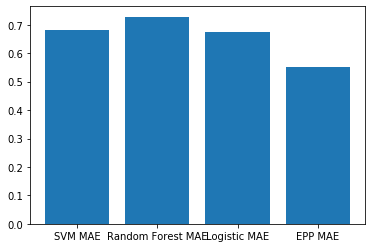

In [15]:

upload()
matrix()
SVM()
random()
logisticRegression()
EPP()
predictPerformance()
graph()